# 8 Deep Learning with Keras

## 8.4 Assignment: Training and Inference with FMNIST Dataset

#### Load dataset and prepare it

In [2]:
import numpy as np
from keras.datasets import fashion_mnist

In [3]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

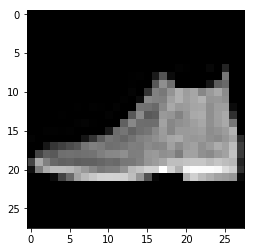

In [8]:
plt.imshow(x_test[0], cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [11]:
# https://github.com/zalandoresearch/fashion-mnist
class_names = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

In [12]:
# Convert to one-hot format/encoding
from keras.utils.np_utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_train.shape

(60000, 10)

In [16]:
x_train.max()

255

In [17]:
# Scale
x_test = x_test / x_test.max()
x_train = x_train / x_train.max()

In [18]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

#### Create model and train it

In [19]:
from keras.models import Sequential
# We load all layer types we're going to use
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
# We create the model with the layers
model = Sequential()

# CONVOLUTIONAL layer:
# 32 filters is quite standard (if complex images, more)
# 4x4 size for the filter kernels is also standard (3-4)
# input shape (for each image) is given by the dataset image shape
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# POOLING layer:
# 2x2 is also quiste a standard size for max-pooling
# Note: in the new version of keras it's called MaxPooling2D - but MaxPool2D also works
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN layer: 2D (images) --> 1D (for later class array)
model.add(Flatten())

# Map the flattened array to the class array with a fully connected layer
# The mapping is done in 2 steps (that's also quite usual)
# 28x28 = 784
# 28 - (3) = 25 -> 25x25 = 625; 4x4 kernel without padding and stride=1 results in 25 pixels
# floor(25/2)*floor(25/2) = 12x12 = 144; max-pool: every 4 pixels 1 (max) taken
# 144 -> 128 -> 10 (classes)
# Often powers of 2 are used as steps: 64, 128, 256, 512, 1024, ...
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # last activation to classes requires softmax for probabilities

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
60000/60000 [==============================] - 518s 9ms/step - loss: 0.3950 - acc: 0.8594
Epoch 2/2
60000/60000 [==============================] - 514s 9ms/step - loss: 0.2757 - acc: 0.9015


In [24]:
# Evaluation
# Get metrics used to evaluate: loss, acc
model.metrics_names

['loss', 'acc']

In [25]:
# Test set should be similar to train set in terms of accuracy
# If train set is much better, we have overfitted
# loss, acc
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 33s 3ms/step


[0.27677204971313474, 0.8997]

In [26]:
from sklearn.metrics import classification_report

In [27]:
# IMPORTANT NOTE:
# model.predict_classes() does not deliver predictions as one-hot
# but as class categories 0-9
# HOWEVER, note that we train with categorical y values!
# This difference is relevant for the classification report
y_pred = model.predict_classes(x_test)

In [28]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [29]:
# We get very good results
# This type of standard conv networks (withthe architecture we defined)
# seems to work very well for hand-written digits
print(classification_report(y_test, y_pred)) # labels, predictions

             precision    recall  f1-score   support

          0       0.86      0.84      0.85      1000
          1       0.99      0.98      0.98      1000
          2       0.83      0.82      0.83      1000
          3       0.87      0.94      0.90      1000
          4       0.83      0.84      0.84      1000
          5       0.97      0.98      0.98      1000
          6       0.74      0.69      0.71      1000
          7       0.96      0.95      0.96      1000
          8       0.97      0.98      0.98      1000
          9       0.96      0.97      0.97      1000

avg / total       0.90      0.90      0.90     10000

